In [ ]:
!pip install tbats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 588.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

x = pd.read_csv('/content/drive/MyDrive/TataSteel10years.csv')
# x = pd.read_csv('TISC Historical Data.csv')

Mounted at /content/drive


In [ ]:
x.head()

reversed_x = x.iloc[::-1]

reversed_x.head()

x_sorted = reversed_x.reset_index(drop=True)

x_sorted.head()

x_sorted['Date'] = pd.to_datetime(x_sorted['Date'])


split = int(len(x_sorted)*0.7)
test = x_sorted[split:]
train = x_sorted[:split]

test = test.reset_index(drop=True)
train = train.reset_index(drop=True)

x_sorted.head()

train.head()

test.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-05-04,106.39,107.44,108.67,105.75,249.62M,-0.08%
1,2021-05-05,107.01,108.40,108.83,104.70,192.50M,0.59%
2,2021-05-06,110.09,105.50,112.90,104.25,464.35M,2.87%
3,2021-05-07,118.24,113.50,119.20,113.01,540.75M,7.40%
4,2021-05-10,121.64,121.00,122.90,120.00,280.81M,2.88%


Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

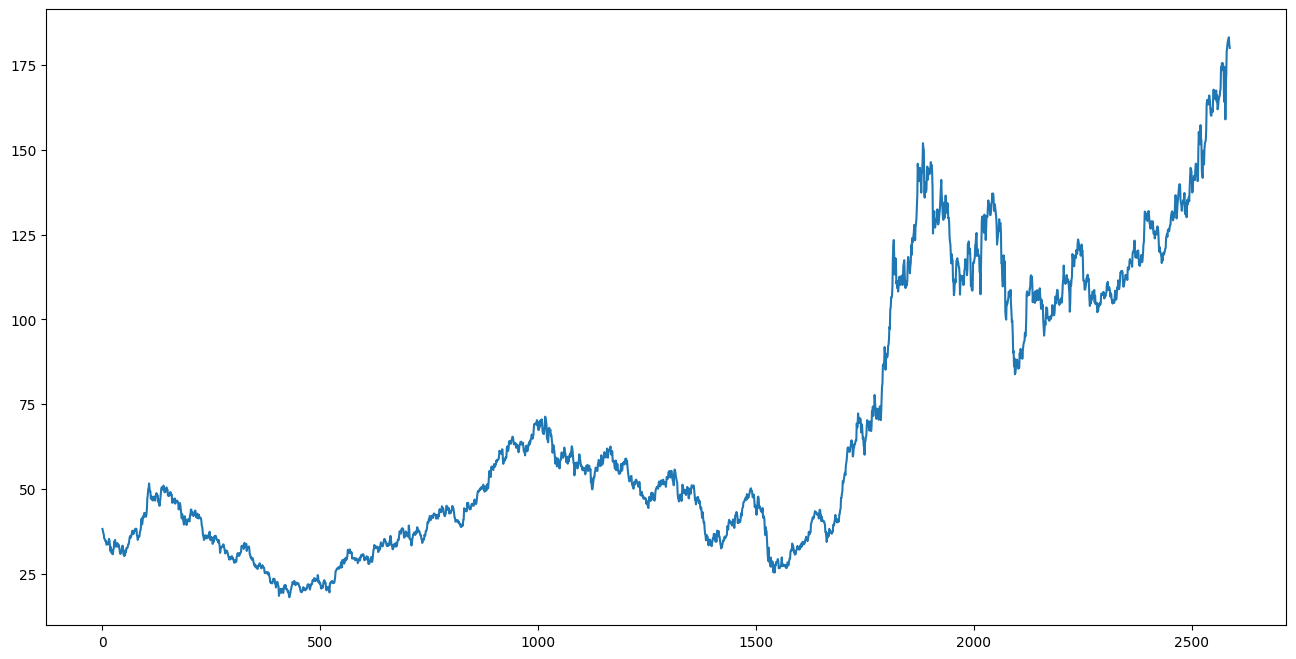

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(x_sorted["Price"], label="Day-wise price")

x.isnull().sum()

In [ ]:
from tbats import TBATS

# Fit the TBATS model
tbats_estimator = TBATS(seasonal_periods=(7, 30.5, 365.25))
tbats_model = tbats_estimator.fit(train['Price'])
tbats_forecast = tbats_model.forecast(steps=7)
predicted_price_next_7_days_tbats = tbats_forecast

In [ ]:
# Time series analysis
print(tbats_model.summary())

print(tbats_model.y_hat)
print(tbats_model.resid)
print(tbats_model.aic)

# Reading model parameters
print(tbats_model.params.alpha)
print(tbats_model.params.beta)
print(tbats_model.params.x0)
print(tbats_model.params.components.use_box_cox)
print(tbats_model.params.components.seasonal_harmonics)

Use Box-Cox: True
Use trend: True
Use damped trend: False
Seasonal periods: []
Seasonal harmonics []
ARMA errors (p, q): (0, 0)
Box-Cox Lambda 0.355574
Smoothing (Alpha): 0.969179
Trend (Beta): 0.013033
Damping Parameter (Phi): 1.000000
Seasonal Parameters (Gamma): []
AR coefficients []
MA coefficients []
Seed vector [ 7.45979313 -0.03168075]

AIC 13512.930131
[ 37.88200757  37.87367821  37.29172815 ...  97.68091178 103.56906961
 104.00481987]
[ 0.32799243 -0.26367821 -0.28172815 ...  5.45908822 -0.16906961
  2.46518013]
13512.930131373883
0.969179382572064
0.013032576067824393
[ 7.45979313 -0.03168075]
True
[]


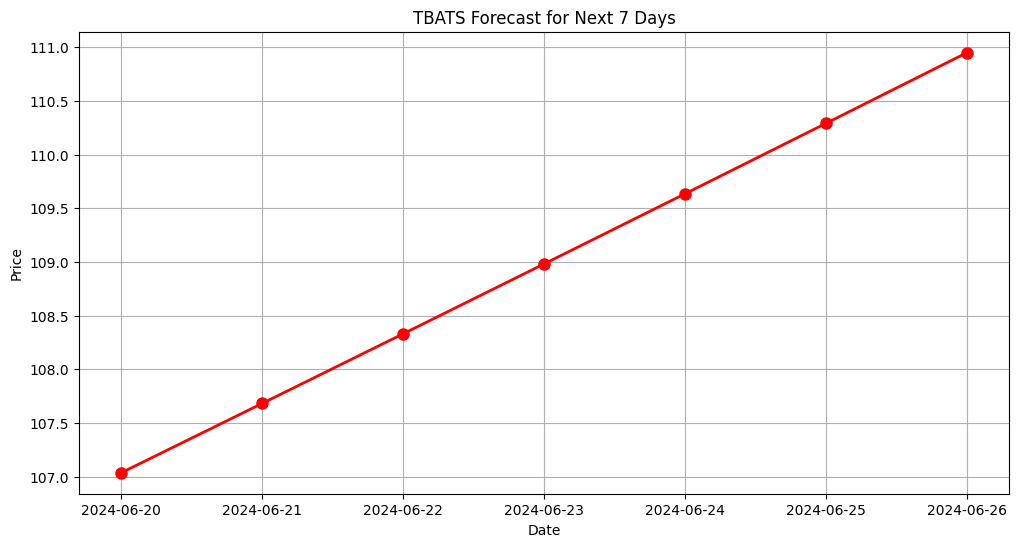

         Date  Forecasted Price
0  2024-06-20        107.036654
1  2024-06-21        107.682342
2  2024-06-22        108.330536
3  2024-06-23        108.981238
4  2024-06-24        109.634454
5  2024-06-25        110.290187
6  2024-06-26        110.948443


In [ ]:
# Create a date range for the forecast
last_date = pd.to_datetime(test['Date'].iloc[-1])
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

# Plot the forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(forecast_index, predicted_price_next_7_days_tbats, color='red', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('TBATS Forecast for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Create a DataFrame with the forecasted prices
forecast_df_tbats = pd.DataFrame({'Date': forecast_index.date, 'Forecasted Price': predicted_price_next_7_days_tbats})
print(forecast_df_tbats)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error
actual_stock_price = test.iloc[:,1:2].values

def print_metrics(model_name, actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual, predicted)
    mda = median_absolute_error(actual, predicted)
    directional_accuracy = np.mean(np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - actual[:-1])) * 100

    print(f"{model_name} Metrics:")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAPE:", mape)
    print("Median Absolute Error:", mda)
    print("Directional Accuracy:", directional_accuracy, "%")
    print()


print_metrics("TBATS", actual_stock_price[-7:], predicted_price_next_7_days_tbats)

TBATS Metrics:
MAE: 72.5394495295654
MSE: 5264.9301098487485
RMSE: 72.55983813273531
MAPE: 0.3995870139939611
Median Absolute Error: 73.51554622038472
Directional Accuracy: 33.33333333333333 %

